In [1]:
import sys
sys.path.append("../")
from initial_dataSet import DataSet
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import torch

%matplotlib inline

In [2]:
save_list = ('a0910/', 'a2017/', 'junyi/', 'math_ec/')
dataSet_list = ('ASSIST_0910', 'ASSIST_2017','JUNYI', 'MathEC')
models=['DINA','NCD','CDGK','CICDM-A','CICDM']
x_label=['poor','medium','good','excellent']
model_data={}
for model in models:
    data_list=[]
    for dataName in dataSet_list:
        data=[]
        data_i=pd.read_csv('./output/cluster/'+model+'/'+dataName+'_cluster.csv')
        a=data_i.loc[:,['cluster','mean proficiency']]

        for j in range(4):
            data.append(a[a['cluster']==j]['mean proficiency'].to_list())

        data_list.append(data)
    model_data[model]=data_list

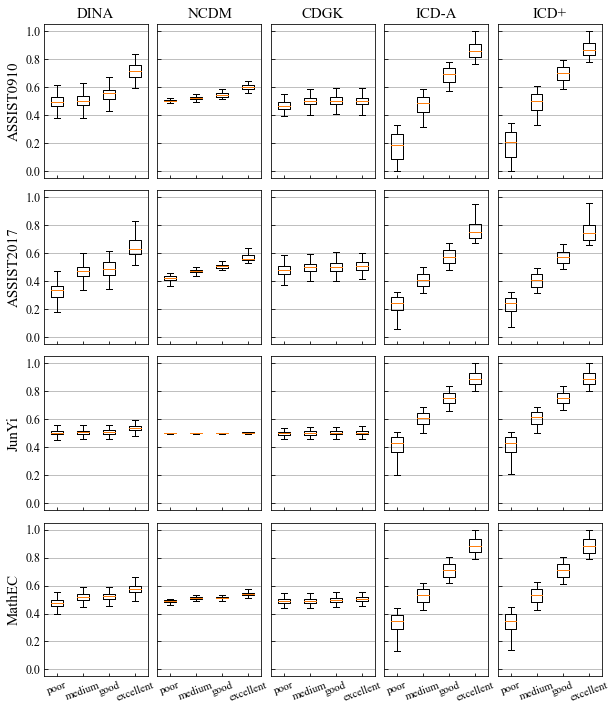

In [3]:
y_label=['ASSIST0910','ASSIST2017','JunYi','MathEC']
titles=['DINA','NCDM','CDGK','ICD-A','ICD+']
x_label=['poor','medium','good','excellent']

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

fig,axes = plt.subplots(4,5,sharey=True,figsize=(10,12))
plt.subplots_adjust(wspace=0.09,hspace=0.08)


for j in range(5): # 模型
    data_j=model_data[models[j]]
    for i in range(4): # 数据集
        data_i=data_j[i]
        # axes[i,j].set_ylim((0.0,1.0))
        axes[i,j].grid(axis='y',linestyle = '-',zorder=0)
        axes[i,j].boxplot(data_i,labels=x_label,showfliers=False)
        axes[i,j].set_xticklabels([])
        axes[i,j].set_yticks(np.array([0,0.2,0.4,0.6,0.8,1]))
        axes[i,j].set_yticklabels(np.array([0,0.2,0.4,0.6,0.8,1]),
            fontdict={'family':'Times New Roman', 'size': 12})
        if j==0:    
            axes[i,j].set_ylabel(y_label[i],fontdict={'family':'Times New Roman', 'size': 15})
        else:
            axes[i,j].set_ylabel(None)
        if i==0:
            axes[i,j].set_title(titles[j],fontdict={'family':'Times New Roman', 'size': 15})
        if i==3:
            axes[i,j].set_xticks([1,2,3,4])
            axes[i,j].set_xticklabels(x_label,rotation=20,
                fontdict={'family':'Times New Roman', 'size': 11})

fig.savefig('./output/box.jpg',dpi=1200,bbox_inches='tight')  
plt.show()  